In [14]:
import numpy as np
from __future__ import division

%matplotlib inline
from matplotlib import pyplot as plt

In [34]:
N=1000
T=1000
L=10000
r=10**-8
pvals=[0.75,0.05,0.05,0.15]

R2 = []
P1 = []
Q1 = []

P11 = []
P12 = []
P21 = []
P22 = []

numr = 0
numr2 = 0
for t in range(T):

    n = np.random.multinomial(N,pvals)
    types = np.concatenate((0*np.ones(n[0]),1*np.ones(n[1]),2*np.ones(n[2]),3*np.ones(n[3])))
    
    order = np.random.permutation(N)
    assert N % 2 == 0
    for m in range(int(N/2)):
        m = 2*m
        mate1 = order[m]
        mate2 = order[m+1]
        ## mating between order[m], order[m+1]
        
        ## crossover event simulation
        X = np.random.poisson(r*L)
        if X % 2 == 0:
            if X == 2:
                numr2 += 1
            continue
        
        numr += 1
        
        if types[mate1] == 0 and types[mate2] == 3 or types[mate1] == 3 and types[mate2] == 0:
            n[0] -= 1
            n[3] -= 1
            n[1] += 1
            n[2] += 1
        elif types[mate1] == 1 and types[mate2] == 2 or types[mate1] == 2 and types[mate2] == 1:
            n[0] += 1
            n[3] += 1
            n[1] -= 1
            n[2] -= 1
            
    pvals = 1/N * n
    p11 = pvals[0]
    p1 = pvals[0] + pvals[1]
    q1 = pvals[0] + pvals[2]
    
    R2.append( (p11 - p1*q1) / (p1*(1-p1)*q1*(1-q1)) )
    P1.append(p1)
    Q1.append(q1)
    
    P11.append(pvals[0])
    P12.append(pvals[1])
    P21.append(pvals[2])
    P22.append(pvals[3])
    
    ### Expanding population option:
    ##N *= np.exp(0.01)
    ##N = int(N) - (int(N) % 2)

In [31]:
numr,numr2

(50, 0)

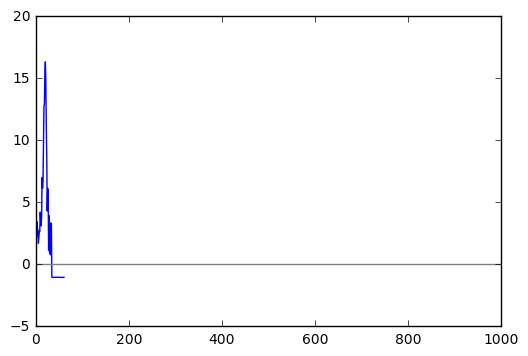

In [32]:
plt.plot(range(T),R2)
plt.plot(range(T),np.zeros(T),color='gray')

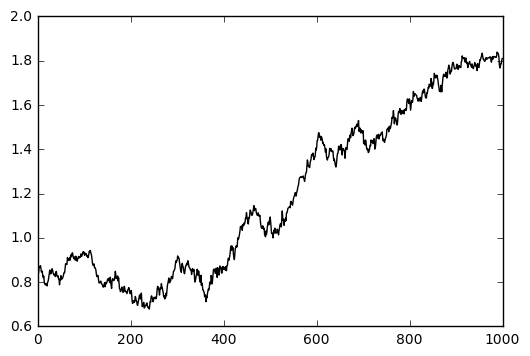

In [35]:
plt.plot(range(T),P1+np.array([1/(1+(0.995)/0.005*np.exp(-20*t/2000)) for t in range(T)]),color='black')
plt.savefig('/Users/ajstern/Desktop/clues/traj_1.pdf',format='pdf',transparent=True)
#plt.plot(range(T),Q1,color='green')

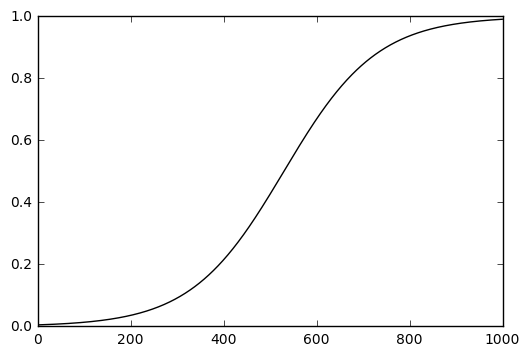

In [36]:
plt.plot(range(T),np.array([1/(1+(0.995)/0.005*np.exp(-20*t/2000)) for t in range(T)]),color='black')
plt.savefig('/Users/ajstern/Desktop/clues/exptraj.pdf',format='pdf',transparent=True)

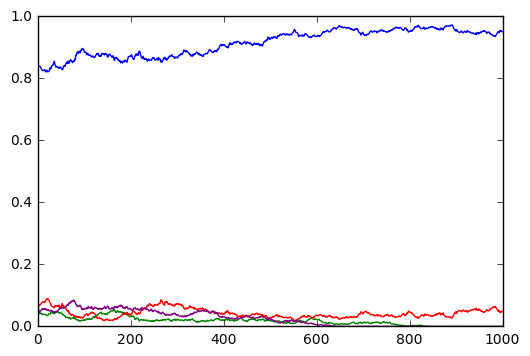

In [118]:
plt.plot(range(T),P11,color='blue')
plt.plot(range(T),P12,color='green')
plt.plot(range(T),P21,color='red')
plt.plot(range(T),P22,color='purple')
